<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/%5BAula_06%5D_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 06 - Utilização do Apriori

## Carregar a biblioteca do Apyori

In [53]:
!pip install apyori

In [54]:
from apyori import apriori

## Baixar o arquivo com listas de lista de compras.

O arquivo se encontra em: https://drive.google.com/file/d/1OMKHXvKM21gSpxscAX5-kZlJZJvU4qXU/view?usp=sharing

Realizar a leitura do arquivo, sem o Pandas.

In [55]:
transacoes = []

with open('mercado_ficticio.csv') as f:
    for transacao in f:
      # items = transacao.replace('\n', '').split(', ') # outra opção
      items = transacao.strip().split(', ')
      transacoes.append(items)

In [56]:
transacoes

[['café', 'pao', 'manteiga'],
 ['leite', 'cerveja', 'pao', 'manteiga'],
 ['café', 'pao', 'manteiga'],
 ['leite', 'café', 'pao', 'manteiga'],
 ['cerveja'],
 ['manteiga'],
 ['pao'],
 ['feijao'],
 ['arroz', 'feijao'],
 ['arroz']]

## Realizar chamada ao Apriori

Lembre-se: o Apriori espera **sempre** uma lista de transações. 
Ou seja, uma lista com várias listas de produtos de uma única compra. 

Com isso e os parâmetros que forem utilizados, o Apriori será capaz de encontrar possíveis relações entre produtos.

Parâmetros a serem definidos:
- *min_support* (suporte mínimo);
- *min_confidence* (confiança mínima);
- *min_lift* (lift mínimo);
- *min_length* (tamanho mínimo da lista de regras resultante)
- *max_length* (tamanho máximo da lista de regras resultante)

In [57]:
regras = apriori(transacoes, min_support=.2, min_confidence=.41, min_lift=1.01, max_length=2)

Temos ainda que converter o retorno do apriori para ***list***.

In [58]:
regras = list(regras)
regras

[RelationRecord(items=frozenset({'manteiga', 'café'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'café'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'manteiga'}), items_add=frozenset({'café'}), confidence=0.6, lift=2.0)]),
 RelationRecord(items=frozenset({'café', 'pao'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'café'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao'}), items_add=frozenset({'café'}), confidence=0.6, lift=2.0)]),
 RelationRecord(items=frozenset({'manteiga', 'leite'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'leite'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'leite'}), support=0.2, ordered_statistics=[OrderedStatistic(items_base=frozenset({'leite'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0

## Verificando os resultados obtidos

In [59]:
regras[0]

RelationRecord(items=frozenset({'manteiga', 'café'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'café'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'manteiga'}), items_add=frozenset({'café'}), confidence=0.6, lift=2.0)])

In [60]:
for i in regras:
  items = list(i[0])
  print(items)
  print("Regra: " + items[0] + " -> " + items[1])

  print("Suporte: " + str(i[1]))
  print("Confiança: " + str(i[2][0][2]))
  print("Lift: " + str(i[2][0][3]))
  print("=====================================")

['manteiga', 'café']
Regra: manteiga -> café
Suporte: 0.3
Confiança: 1.0
Lift: 2.0
['café', 'pao']
Regra: café -> pao
Suporte: 0.3
Confiança: 1.0
Lift: 2.0
['manteiga', 'leite']
Regra: manteiga -> leite
Suporte: 0.2
Confiança: 1.0
Lift: 2.0
['pao', 'leite']
Regra: pao -> leite
Suporte: 0.2
Confiança: 1.0
Lift: 2.0
['manteiga', 'pao']
Regra: manteiga -> pao
Suporte: 0.4
Confiança: 0.8
Lift: 1.6


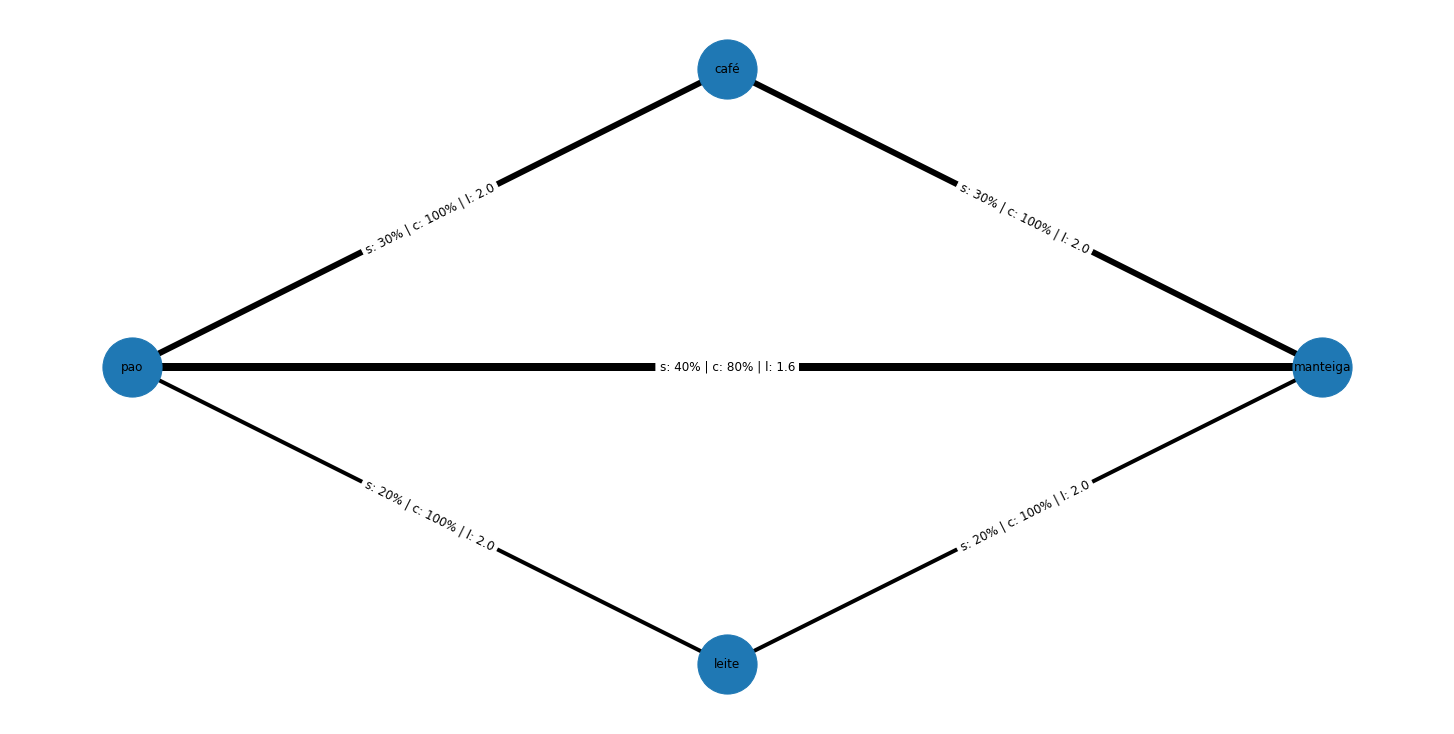

In [61]:
informacoes = []

for i in regras:
    items = list(i[0])

    informacoes.append({
        'de': items[0],
        'para': items[1],
        'suporte': float(i[1]) ,
        'confianca': float(i[2][0][2]),
        'lift': float(i[2][0][3])
    })
    
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

df = pd.DataFrame(informacoes)
G = nx.Graph()
plt.figure()

for i, v in df.iterrows():
    texto = "s: " + str(int(v["suporte"] * 100)) + "% | c: " + str(int(v["confianca"] * 100)) + "% | l: " + str(v["lift"])
    G.add_edge(v["de"], v["para"], weight=v["suporte"] * 100, label=texto, espessura=v["suporte"] * 20)

pos = nx.circular_layout(G)
weights = list(nx.get_edge_attributes(G, 'espessura').values() )
nx.draw(G, pos, with_labels=True, 
        width=weights,
        font_size=12,
        node_size=3500)

labels = nx.get_edge_attributes(G, 'label') 
nx.draw_networkx_edge_labels(G, pos, font_color='black', edge_labels=labels, label_pos=.5, font_size=12)
plt.show()

In [62]:
df_1 = df.pivot(index='de', columns='para', values='suporte').fillna(0)
df_1.head()

para,café,leite,pao
de,,,
café,0.0,0.0,0.3
manteiga,0.3,0.2,0.4
pao,0.0,0.2,0.0


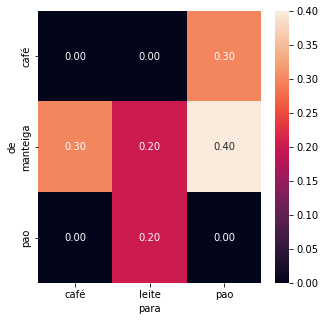

In [63]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(df_1, annot=True, fmt='.2f');

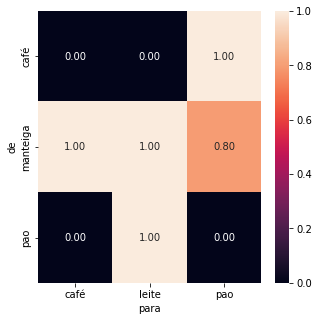

In [64]:
import seaborn as sns

sns.heatmap(df.pivot(index='de', columns='para', values='confianca').fillna(0),
            annot=True, fmt='.2f');

## Salvar "modelo" com Pickle

Usando o nome "regras.pickle" e usando o médoto dump.

In [67]:
import pickle

with open('regras.pickle' ,'wb') as arquivo:
  pickle.dump(regras, arquivo)